## Actividad 2

**Ejercicio:** 
Suponga que le han pedido averiguar si existe una relación entre el número  de  veces  que  batean  los  jugadores  de  un  equipo  de  béisbol  y  el número de runs que consigue. En caso de existir y de establecer un modelo, podría predecir el resultado del partido para los siguientes datos:

In [1]:
import pandas as pd

In [2]:
# Datos 
#======================================================================= 

equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.","Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago","Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona","Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa","Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598, 5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]
runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654,735, 667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570, 593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})

#### 1.  Obtenga la distribución de los datos 

In [3]:
datos.describe()

,bateos,runs
count,30.000000,30.000000
mean,5523.500000,693.600000
std,79.873067,82.479088
min,5417.000000,556.000000
25%,5448.250000,629.000000
50%,5515.500000,705.500000
75%,5575.000000,734.000000
max,5710.000000,875.000000


#### 2.  Separe sus datos de entrenamiento en 80/20.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = datos[['bateos']]
y = datos.runs

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=34
)

#### 3.  Ajuste un modelo de regresión lineal.

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
# Create a linear regression model
model = LinearRegression()

# Fit the model on the training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
score = model.score(X_test, y_test)

print("Model Score:", score)

Model Score: 0.5128192143103611


#### 4.  Escriba la recta de regresión que obtuvo con sus estimaciones respectivas. 

In [9]:
coefficients = model.coef_[0]
intercept = model.intercept_
display("Coefficients:", coefficients)
display("Intercept:", intercept)

'Coefficients:'

0.5717082999158859

'Intercept:'

-2464.860509868743

#### 5.  Obtenga la gráfica de los datos y su recta de regresión 

In [10]:
# Calcular los valores de la recta de regresión
x_min = X.min()
x_max = X.max()
y_min = intercept + coefficients * x_min
y_max = intercept + coefficients * x_max

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

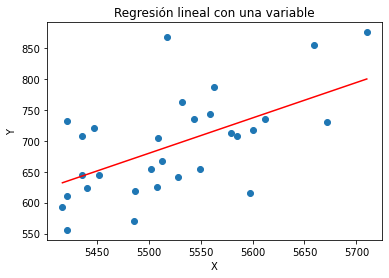

In [12]:
# Graficar los datos de entrenamiento
plt.scatter(X, y)

# Graficar la recta de regresión
plt.plot([x_min, x_max], [y_min, y_max], color='red')

# Personalizar la figura
plt.title('Regresión lineal con una variable')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#### 6.  Obtenga las métricas: MAE, MSE, RMSE. 

In [13]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [14]:
# Mean Squared Error (MSE)
mse = mean_squared_error(X_test, y_test)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(X_test, y_test, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Deviation (MAD)
mad = mean_absolute_error(X_test, y_test)
print("Mean Absolute Deviation (MAD):", mad)

Mean Squared Error (MSE): 23307964.666666668
Root Mean Squared Error (RMSE): 4827.832294795116
Mean Absolute Deviation (MAD): 4827.666666666667


#### 7.  Concluya con los datos obtenidos y comente la problemática que le han planteado al principio.

**De los datos observados se puede ver una relacion proporcional entre el numero de bateos y numero de homeruns, cuando un equipo tiene mas opciones de bateo tiene mas posibilidades de realizar un homerun y por ende marcar mas putnos para ganar el partido**